# Analysing Outbreaks
This notebook takes in the day the pandemic broke into each town according to simulations as an input and calculates average day to reach town, standard deviation, and plots the frequency (may convert it to probability later)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np
import csv

In [6]:
free = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/free_movement.csv', header = None)
regn = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/regional_restrictions.csv', header = None)
lock = pd.read_csv('/Volumes/HardDrive/New_Workflow/breaks_44_<250/full_lockdown.csv', header = None)

In [7]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos_withregions.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

In [8]:
region_color_dict = {'Perth':'0','Gascoyne':'40','Goldfields-Esperance':'41','Great Southern':'42','Kimberley':'43',
                    'Mid West':'44','Pilbara':'45','South West':'46', 'Wheatbelt':'47','Peel':'105'}

for item in region_color_dict:
    print('\033[;' + region_color_dict[item] +'m  ','\033[0m' +item)

   Perth
   Gascoyne
   Goldfields-Esperance
   Great Southern
   Kimberley
   Mid West
   Pilbara
   South West
   Wheatbelt
   Peel


In [9]:
latex_color_dict = {'Perth':'White','Gascoyne':'Peach','Goldfields-Esperance':'Goldenrod','Great Southern':'Salmon',
                    'Kimberley':'Bittersweet','Mid West':'BurntOrange','Pilbara':'Purple',
                    'South West':'PineGreen', 'Wheatbelt':'WildStrawberry','Peel':'Cyan'}

In [10]:
list(waloc.iloc[0])

['Perth', 1874578, 115.8605, -31.9505, 'Perth']

In [11]:
ave_breaks_free = {}
std_breaks_free = {}
tot_breaks_free = {}

ave_breaks_regn = {}
std_breaks_regn = {}
tot_breaks_regn = {}

ave_breaks_lock = {}
std_breaks_lock = {}
tot_breaks_lock = {}

savelist = []

for i in range(44):
    
    sl = []
    
    reg = list(waloc.iloc[i])[-1]
    town = list(waloc.iloc[i])[0]
    
    sl.append(reg)
    sl.append(town)
    
    cou = list(free[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    breakin = len(nonan_cou)/len(cou)*100
    ave_breaks_free[town] = ave
    std_breaks_free[town] = std
    tot_breaks_free[town] = breakin
    
    sl.append(breakin)
    sl.append(ave)
    
    cou = list(regn[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    breakin = len(nonan_cou)/len(cou)*100
    ave_breaks_regn[town] = ave
    std_breaks_regn[town] = std
    tot_breaks_regn[town] = breakin
    
    sl.append(breakin)
    sl.append(ave)
    
    cou = list(lock[i])
    nonan_cou =  [x for x in cou if np.isnan(x) == False]
    ave = np.mean(nonan_cou)
    std = np.std(nonan_cou)
    if np.isnan(ave):
        ave = 1000
        std = 1000
    breakin = len(nonan_cou)/len(cou)*100
    ave_breaks_lock[town] = ave
    std_breaks_lock[town] = std
    tot_breaks_lock[town] = breakin
    
    sl.append(breakin)
    sl.append(ave)
    
    #savelist.append(sl)
    
sd = {k: v for k, v in sorted(ave_breaks_free.items(), key=lambda item: item[1])}
print("{:22s} {:>30s} {:>30s} {:>30s}".format('Town','Free Movement', 'Regional Borders', 'Full Lockdown'))
print("{:2s} {:20s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}".format('','Town', 'Break-in', 'Ave. Days','StDev','Break-in','Ave. Days' , 'StDev', 'Break-in', 'Ave. Days' , 'StDev'))

for item in sd:
    reg = list(waloc.loc[waloc['City / Town']==item]['Region'])[0]
    print('\033[;' + region_color_dict[reg] +'m  ','\033[0m'+"{:20s} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f} {:10.1f}".format(item,
                                                          tot_breaks_free[item],                                                                                           
                                                          ave_breaks_free[item], 
                                                          std_breaks_free[item], 
                                                        tot_breaks_regn[item],
                                                         ave_breaks_regn[item],
                                                         std_breaks_regn[item],
                                                        tot_breaks_lock[item],
                                                        ave_breaks_lock[item], 
                                                        std_breaks_lock[item]))
    # This is to make it ready for LaTeX
    savelist.append(['\rowcolor{' + latex_color_dict[reg] + '!60}' + reg, item,
                     str(round(tot_breaks_free[item],1))+"\%",round(ave_breaks_free[item],1),
                     str(round(tot_breaks_regn[item],1))+"\%",round(ave_breaks_regn[item],1),
                     str(round(tot_breaks_lock[item],1))+'\%',round(ave_breaks_lock[item],1)])
    
print('___________________________________________________________________________________________________________')
print('Key:')
for item in region_color_dict:
    print('\033[;' + region_color_dict[item] +'m  ','\033[0m' +item)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Town                                    Free Movement               Regional Borders                  Full Lockdown
   Town                   Break-in  Ave. Days      StDev   Break-in  Ave. Days      StDev   Break-in  Ave. Days
   Perth                     100.0        0.0        0.0      100.0        0.0        0.0      100.0        0.0
   Mandurah                  100.0        7.8        5.0      100.0       13.1        7.6       98.0       25.2
   Newman                    100.0       25.6       12.7      100.0       33.5       14.1       49.9       59.8
   Karratha                  100.0       30.9       13.8      100.0       43.4       14.1       25.5       64.9
   Tom Price                 100.0       34.5       14.5      100.0       39.7       14.5       34.8       64.2
   Port Hedland              100.0       35.6       14.4      100.0       44.1       14.2       23.8       67.0
   Kalgoorlie-Boulder        100.0       36.1       14.2      100.0       54.7       12.2        9.6

In [12]:
# with open("/Volumes/HardDrive/New_Workflow/results_44/outbreaks.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerows(savelist)

In [13]:
waloc

,City / Town,Population,long,latt,Region
0,Perth,1874578,115.860500,-31.9505,Perth
1,Bunbury,71090,115.639600,-33.3256,South West
2,Geraldton,31982,114.614400,-28.7797,Mid West
3,Kalgoorlie-Boulder,29875,121.466000,-30.7490,Goldfields-Esperance
4,Albany,29373,117.883700,-35.0269,Great Southern
5,Busselton,25329,115.345500,-33.6532,South West
6,Karratha,15828,116.845800,-20.7353,Pilbara
7,Broome,13984,122.230400,-17.9644,Kimberley
8,Port Hedland,13828,118.486400,-20.9818,Pilbara
9,Esperance,10421,121.992800,-33.4866,Goldfields-Esperance


Text(0.5, 0, 'Days from start of outbreak')

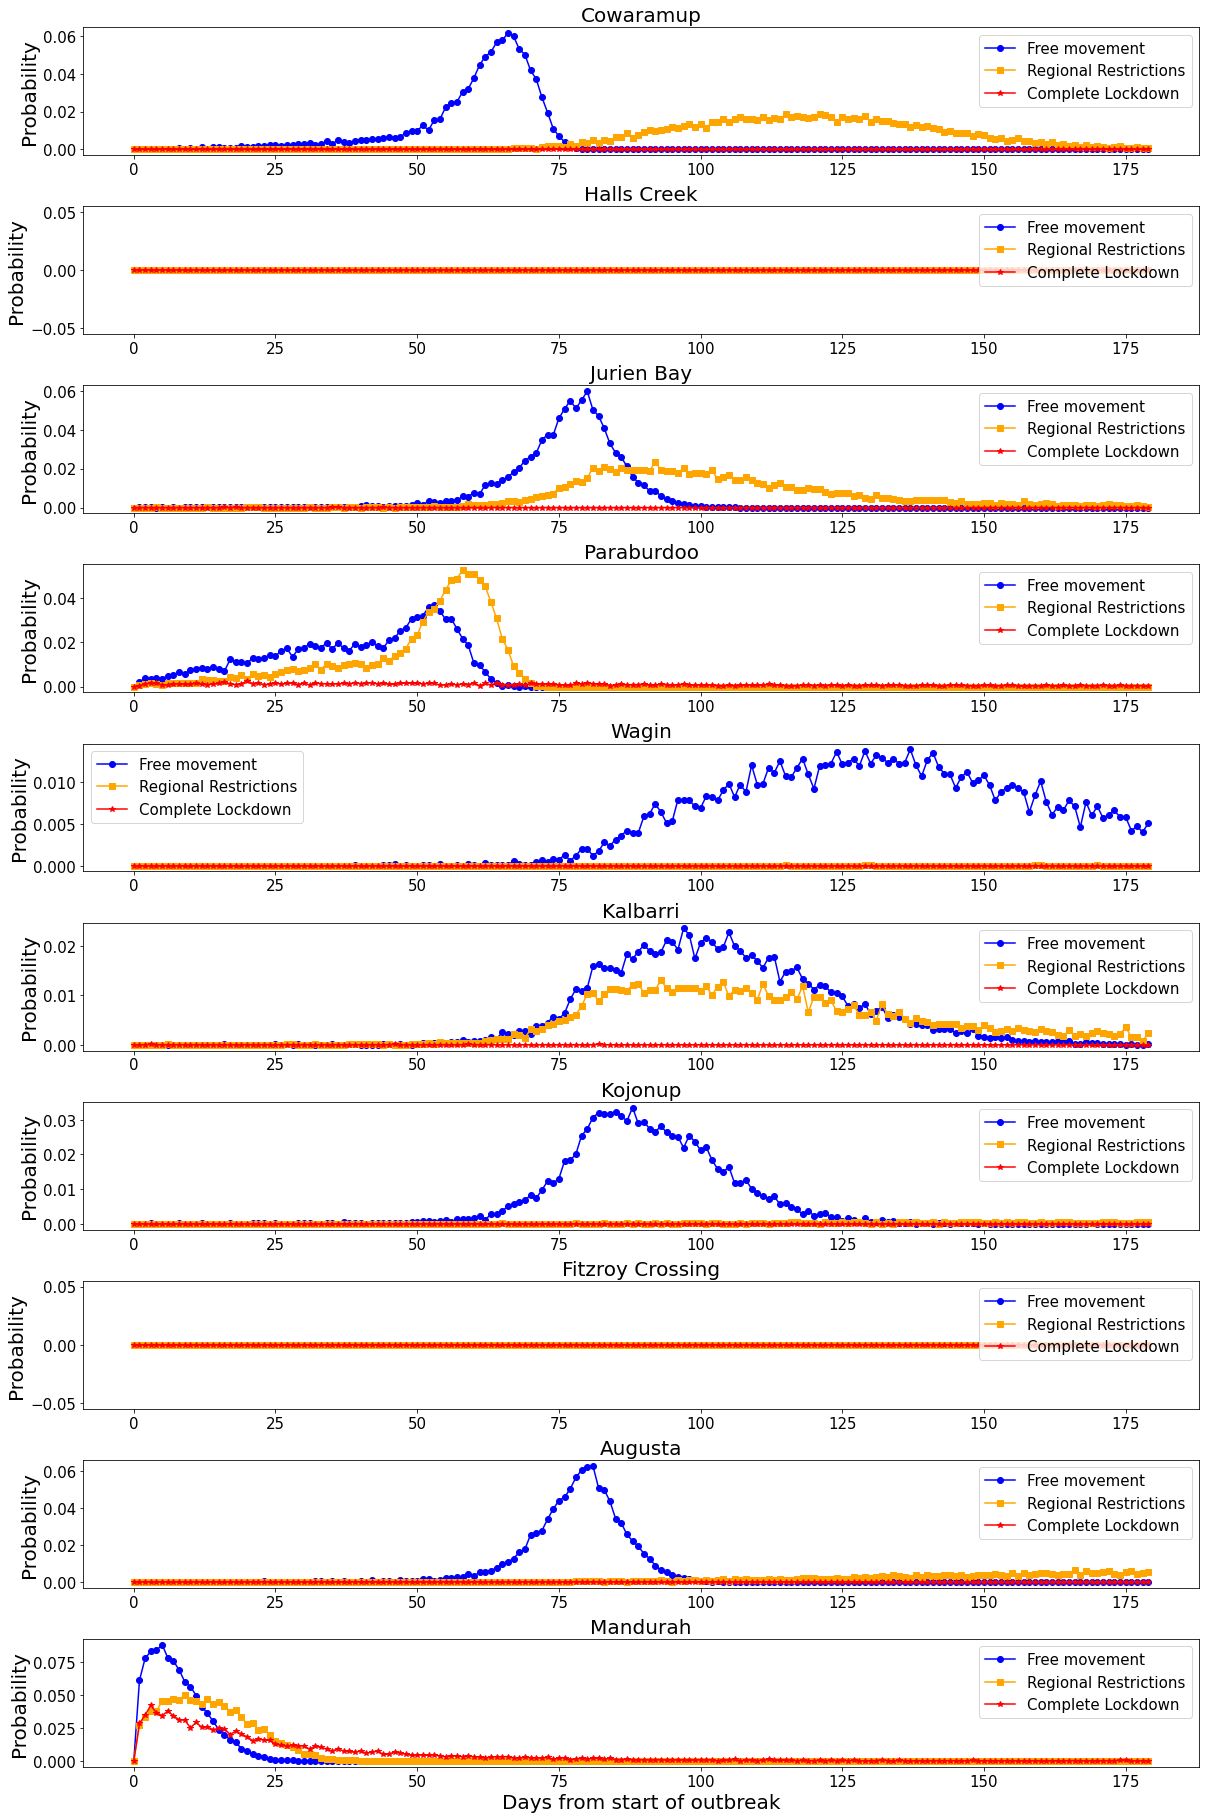

In [21]:
import matplotlib.gridspec as gridspec

#townfocus = [43,1,2,3,7,8,10,12]
townfocus = [i+34  for i in range(10)]

gs = gridspec.GridSpec(10,1)
fig = plt.figure(figsize = (20,32))
#fig = plt.figure(figsize = (20,13))
#fig = plt.figure(figsize = (16,24))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for j in range(len(townfocus)):
    i = townfocus[j]
    ax = fig.add_subplot(gs[j])
    tot_free = []
    cou = Counter(list(free[i]))
    ave = 0
    for day in range(180):
        tot_free.append(cou.get(day,0)/len(free))
        ave += day*cou.get(day,0)
    ave = str(ave/len(free))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_free)*100,1))
    
    tot_regn = []
    cou = Counter(list(regn[i]))
    ave = 0
    for day in range(180):
        tot_regn.append(cou.get(day,0)/len(regn))
        ave += day*cou.get(day,0)
    ave = str(ave/len(regn))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_regn)*100,1))
    
    tot_lock = []
    cou = Counter(list(lock[i]))
    ave = 0
    for day in range(180):
        tot_lock.append(cou.get(day,0)/len(lock))
        ave += day*cou.get(day,0)
    ave = str(ave/len(lock))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_lock)*100,1))
    
    
    ax.set_title(town, fontsize = 20)# + ', ' + breakin  + '% break in, average day: ' + ave, fontsize = 20)
    ax.plot(tot_free, marker = 'o', color = 'blue', label = 'Free movement')
    ax.plot(tot_regn, marker = 's', color = 'orange', label = 'Regional Restrictions')
    ax.plot(tot_lock, marker = '*', color = 'red', label = 'Complete Lockdown')
    ax.legend(fontsize = 15)
    plt.tick_params(axis = 'x', labelsize = 15)
    #ax.set_xticklabels([15*i for i in range(13)],fontsize= 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    #ax.ylim([-0.005,0.075])
    ax.set_ylabel('Probability', fontsize = 20)
ax.set_xlabel('Days from start of outbreak', fontsize = 20)

In [ ]:
for i in range(44):
    plt.figure(figsize = (20,4))
    tot_free = []
    cou = Counter(list(free[i]))
    ave = 0
    for day in range(180):
        tot_free.append(cou.get(day,0)/len(free))
        ave += day*cou.get(day,0)
    ave = str(ave/len(free))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_free)*100,1))
    
    tot_regn = []
    cou = Counter(list(regn[i]))
    ave = 0
    for day in range(180):
        tot_regn.append(cou.get(day,0)/len(regn))
        ave += day*cou.get(day,0)
    ave = str(ave/len(regn))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_regn)*100,1))
    
    tot_lock = []
    cou = Counter(list(lock[i]))
    ave = 0
    for day in range(180):
        tot_lock.append(cou.get(day,0)/len(lock))
        ave += day*cou.get(day,0)
    ave = str(ave/len(lock))
    town = list(waloc.iloc[i])[0]
    breakin = str(round(sum(tot_lock)*100,1))
    
    
    plt.title(town)# + ', ' + breakin  + '% break in, average day: ' + ave, fontsize = 20)
    plt.plot(tot_free, marker = 'o', color = 'blue', label = 'Free movement')
    plt.plot(tot_regn, marker = 'o', color = 'red', label = 'Regional Restrictions')
    plt.plot(tot_lock, marker = 'o', color = 'green', label = 'Complete Lockdown')
    plt.legend()
    plt.xlabel('Days from start of outbreak', fontsize = 15)
    #plt.ylim([-0.005,0.075])
    plt.ylabel('Probability', fontsize = 15)

# Flow checks

In [29]:
lvl2 = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/level_2.csv", header = None, sep =',')

In [31]:
for j in range(44):
    allup = []
    for i in range(len(stoch)):
        allup.append(sum(list(d[str(i)][j])))
    if sum(allup) == 0:
        print(j, list(waloc.iloc[j])[0])

In [35]:
C = 9*10**9

In [36]:
for j in range(44):
    allup = sum(list(lvl2[j]))*C
    #if allup == 0:
    print(j, list(waloc.iloc[j])[0], allup)

0 Perth 156679.47337179093
1 Bunbury 21487.39682510592
2 Geraldton 1866.3588649259473
3 Kalgoorlie-Boulder 8087.131073193139
4 Albany 7088.1672331516875
5 Busselton 24703.33285801632
6 Karratha 12474.065831595539
7 Broome 5071.744648886591
8 Port Hedland 8526.244539065228
9 Esperance 79.63825546910431
10 Collie 4738.369141093193
11 Northam 5217.099231733355
12 Margaret River 1680.0595499688752
13 Dunsborough 16110.603776916436
14 Newman 19328.97500672902
15 Carnarvon 240.62533759612714
16 Narrogin 837.9864058480835
17 Manjimup 2311.0250254963335
18 Katanning 1002.3053249897932
19 Tom Price 10018.412971513802
20 Port Denison-Dongara 1536.04859844466
21 Harvey 3226.2426895014987
22 Merredin 910.5834879942133
23 Denmark 4093.1666159572947
24 York 3028.6367486514455
25 Donnybrook 7972.743024339524
26 Exmouth 81.33274903297281
27 Waroona 89.08022212292173
28 Capel 7742.954051042886
29 Mount Barker 1496.7399096701708
30 Kambalda West 1463.758948436151
31 Little Grove 5308.3620678798425
32 Mo

Look at Carnarvon

In [6]:
free = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/no_rest.csv", header = None, sep =',')
regn = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/regional_only.csv", header = None, sep =',')

In [7]:
sum(free[15])*9*10**9

240.62533759612717

In [8]:
len(np.nonzero(list(round(free[15]*9*10**9)))[0])

7

In [9]:
round(free[15]*9*10**9)

0       2.0
1       0.0
2      25.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20     15.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26     19.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      9.0
37      0.0
38      0.0
39    169.0
40      0.0
41      0.0
42      0.0
43      1.0
Name: 15, dtype: float64

In [10]:
sum(regn[15])*9*10**9

320.44849343348983

In [11]:
round(regn[15]*9*10**9)

0      15.0
1       0.0
2       2.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       1.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      1.0
15      0.0
16      0.0
17      0.0
18      0.0
19      1.0
20      1.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26    285.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      2.0
40      0.0
41      0.0
42      0.0
43     11.0
Name: 15, dtype: float64

In [12]:
len(np.nonzero(list(round(regn[15]*9*10**9)))[0])

9

In [76]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/kalman_all_44_<250")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_44_<250/"+stoch[i], header = None, sep =',')

In [77]:
months = []
for name in stoch:
    m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    mo = int(name[14:16])
    ye = int(name[12:14])
    
    date = str(m[mo-1]) + ' ' + str(ye)
    if date in months:
        months.append('')
    else:
        months.append(date)

In [78]:
carn_out  = []
carn_in = []
for i in range(97):
    carn_out.append(sum(list(d[str(i)][15]))*9*10**9)
    carn_in.append(sum(list(d[str(i)].iloc[15]))*9*10**9)

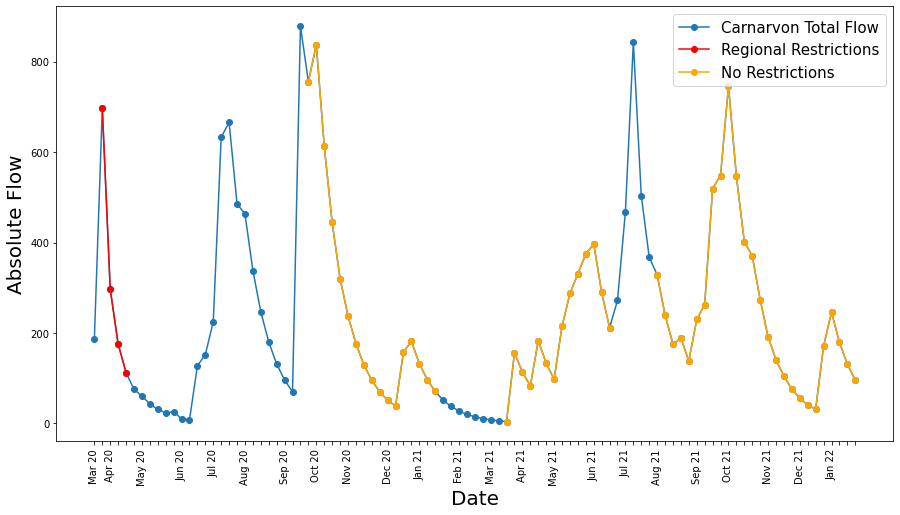

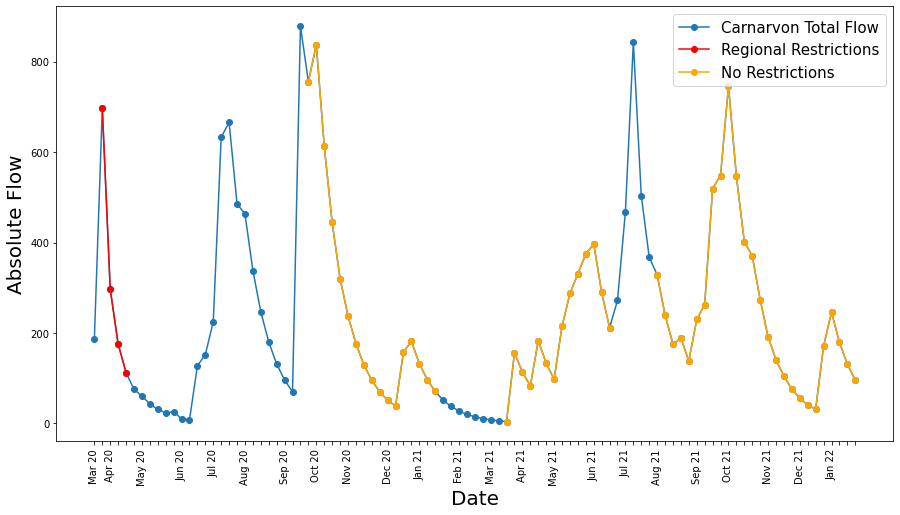

In [79]:
plt.figure(figsize = (15,8))
plt.plot(carn_in, marker = 'o', label = 'Carnarvon Total Flow')
plt.plot([i for i in range(1,5)], carn_in[1:5],marker = 'o', color = 'red', label = 'Regional Restrictions')
#plt.plot([i for i in range(44,46)], carn[44:46],marker = 'o', color = 'red')
#plt.plot([i for i in range(66,67)], carn[66],marker = 'o', color = 'red')
plt.plot([i for i in range(27,44)], carn_in[27:44], marker = 'o', color = 'orange', label = 'No Restrictions')
plt.plot([i for i in range(52,66)], carn_in[52:66], marker = 'o', color = 'orange')
plt.plot([i for i in range(71,97)], carn_in[71:97], marker = 'o', color = 'orange')
plt.xticks([i for i in range(97)],months,rotation = 90,fontsize = 10)
plt.ylabel('Absolute Flow', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.legend(fontsize = 15)

plt.figure(figsize = (15,8))
plt.plot(carn_out, marker = 'o', label = 'Carnarvon Total Flow')
plt.plot([i for i in range(1,5)], carn_out[1:5],marker = 'o', color = 'red', label = 'Regional Restrictions')
#plt.plot([i for i in range(44,46)], carn[44:46],marker = 'o', color = 'red')
#plt.plot([i for i in range(66,67)], carn[66],marker = 'o', color = 'red')
plt.plot([i for i in range(27,44)], carn_out[27:44], marker = 'o', color = 'orange', label = 'No Restrictions')
plt.plot([i for i in range(52,66)], carn_out[52:66], marker = 'o', color = 'orange')
plt.plot([i for i in range(71,97)], carn_out[71:97], marker = 'o', color = 'orange')
plt.xticks([i for i in range(97)],months,rotation = 90,fontsize = 10)
plt.ylabel('Absolute Flow', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.legend(fontsize = 15)

In [99]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/kalman_individual_44_<250")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/kalman_individual_44_<250/"+stoch[i], header = None, sep ='\t')
    
    

In [57]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/44_<250_network")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/44_<250_network/"+stoch[i], header = None, sep =',')

In [105]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/kalman_all_44_<250")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/kalman_all_44_<250/"+stoch[i], header = None, sep =',')

In [84]:
big = 44**2

In [106]:
allvals = []
for i in range(len(d.values())):
    l = d[str(i)].values.tolist()
    av = []
    for i in l:
        for k in i:
            av.append(k)
            allvals.append(k)

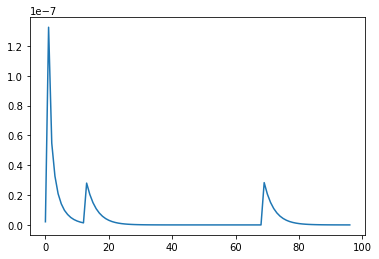

In [107]:
#Create a vector of all entries of a particular edge during all weeks from allvals
def timeseries_vector(x): 
    timeseries = []
    for i in range(97):
        timeseries.append(allvals[x+(big)*i])
    return timeseries
ts = timeseries_vector(15*44+26)
plt.plot(ts)

In [108]:
import networkx as nx
from numpy import genfromtxt

my_data = genfromtxt('/Volumes/HardDrive/New_Workflow/44_towns_network/Town_Flow_20200322_20200328.csv', delimiter=',')
A = nx.from_numpy_matrix(my_data)
A = nx.DiGraph(A)

towns = list(waloc['City / Town'])
labeldict = {}
for node in list(A.nodes()):
    labeldict[node] = towns[node]
    
towns = list(labeldict.values())
edges = []
for t in towns:
    for o in towns:
        edges.append(t +' to ' + o)

2 3.6075122618379813
27 4.481933103671643
316 33.72674087648269
359 4.96653891889217
686 62.7411193113999
1056 5.2335310220283375
1159 4.128770017324944
1419 2.71822641119967
1860 2.3347819614112773
1917 5.98810691477959


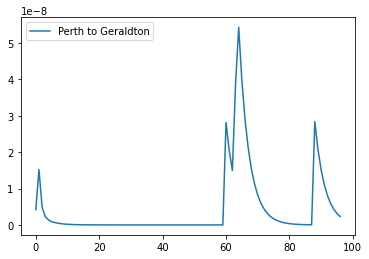

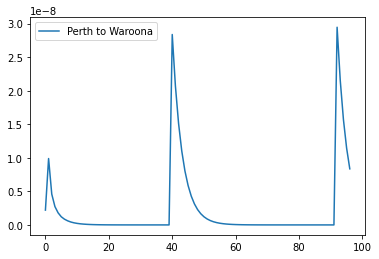

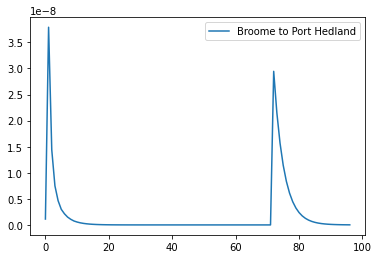

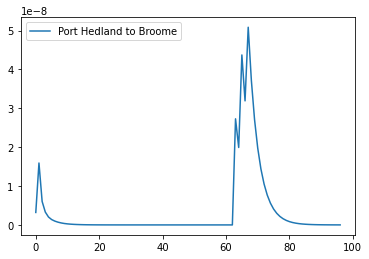

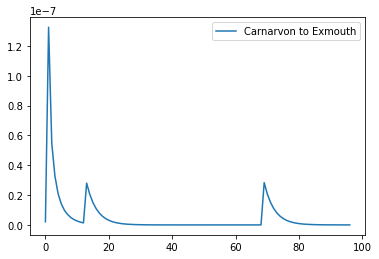

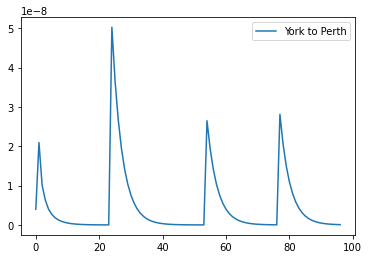

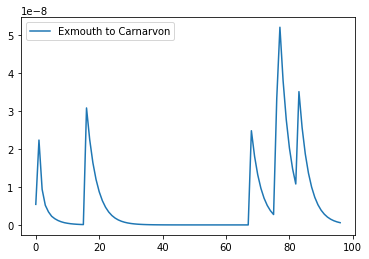

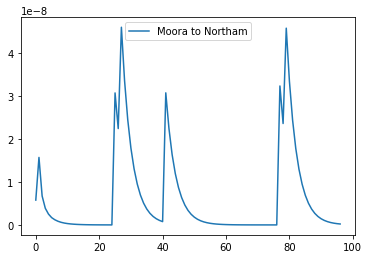

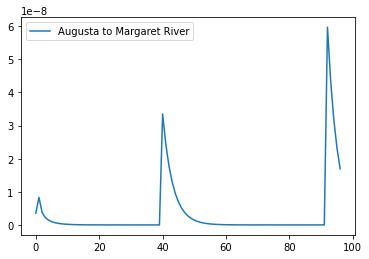

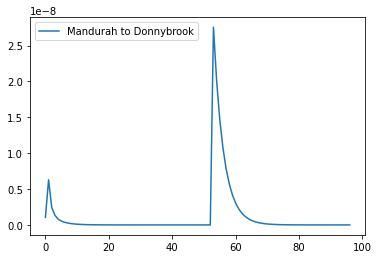

In [109]:
for i in range(big):
    ts = timeseries_vector(i)
    if ts[0] >0 and ts[1] >0:
        div = ts[1]/ts[0]
        if div > 2:
            plt.figure(figsize = (6,4))
            print(i,div)
            plt.plot(ts, label = edges[i])
            plt.legend()

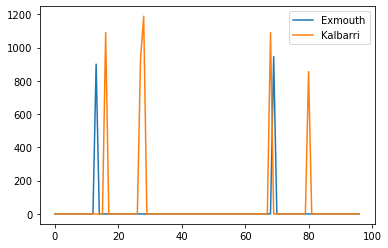

In [58]:
carn = []
for j in range(44):
    carn_time = []
    for i in range(97):
        carn_time.append(list(d[str(i)].iloc[15])[j]*9*10**9)
    if len(np.nonzero(carn_time)[0]) > 0:
        plt.plot(carn_time, label = list(waloc['City / Town'])[j])
plt.legend()

In [74]:
207-4*44

31

In [31]:
d['0'][12][13]

0

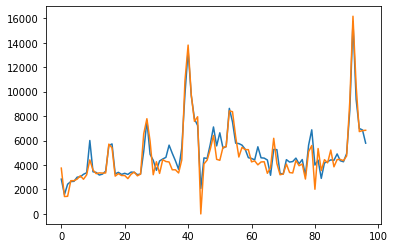

In [75]:
ts1 = []
ts2 = []
for i in range(97):
    ts1.append(d[str(i)][31][4]*9*10**9)
    ts2.append(d[str(i)][4][31]*9*10**9)
plt.plot(ts1)
plt.plot(ts2)

In [61]:
894-20*44

14

In [ ]:
[[]]
for  in range(44):
    for i in range(97):
        carn_time.append(list(d[str(i)][15][])[j]*9*10**9)
    plt.plot(carn_time, label = list(waloc['City / Town'])[j])

In [1]:
# Does one of Exmouth / Kalbarri have an early spike?

In [25]:
waloc.iloc[39]

City / Town    Kalbarri
Population         1349
long           114.1646
latt           -27.7104
Region         Mid West
Name: 39, dtype: object

In [21]:
st = os.listdir("/Volumes/HardDrive/New_Workflow/44_<250_network")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/44_<250_network/"+stoch[i], header = None, sep =',')

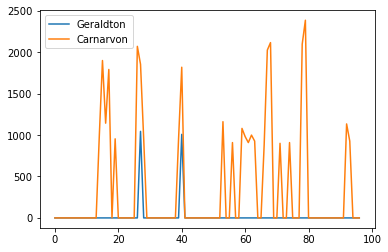

In [30]:
exm = []
kal = []
for j in range(44):
    exm = []
    kal = []
    for i in range(97):
        exm.append(list(d[str(i)].iloc[26])[j]*9*10**9)
        kal.append(list(d[str(i)].iloc[39])[j]*9*10**9)
    if len(np.nonzero(exm)[0]) > 0:
        plt.plot(exm, label = list(waloc['City / Town'])[j])
    if len(np.nonzero(kal)[0]) > 0:
        plt.plot(kal, label = list(waloc['City / Town'])[j])
plt.legend()

Look at Kimberley

In [30]:
free = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions_44_<250/no_rest.csv", header = None, sep =',')

In [36]:
print(list(free[35]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.144439815261698e-09, 0.0, 0.0]


In [16]:
waloc.iloc[22]

City / Town    Port Denison-Dongara
Population                     2782
long                        114.922
latt                       -29.2339
Name: 22, dtype: object

In [62]:
sum(list(d[str(0)][9]))

0.0

In [22]:
for i in range(48):
    if np.isnan(np.nanmean(cb[i])):
        print(i,list(waloc.iloc[i])[0])

9 Esperance
15 Carnarvon
16 Kununurra
20 Derby
37 Halls Creek
43 Boddington-Ranford
44 Fitzroy Crossing
47 Wyndham


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
